# Gallery of filtered images

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
from skimage import color
from skimage import io
import os

In [2]:
image = cv2.imread(os.path.join('images', 'sunsetsmall.JPG')) # reads the image
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # convert to HSV

In [3]:
blur_sizes = [3, 7, 15, 35]

all_gauss_images = [image] + [
    cv2.GaussianBlur(image,(blur_size, blur_size), 0) for blur_size in blur_sizes]

all_median_images = [image] + [
    cv2.medianBlur(image,(blur_size), 0) for blur_size in blur_sizes]

all_mean_images = [image] + [
    cv2.blur(image,(blur_size, blur_size), 0) for blur_size in blur_sizes]

all_bilateral_images = [image] + [
    cv2.bilateralFilter(image, blur_size, 100, 100) for blur_size in blur_sizes]

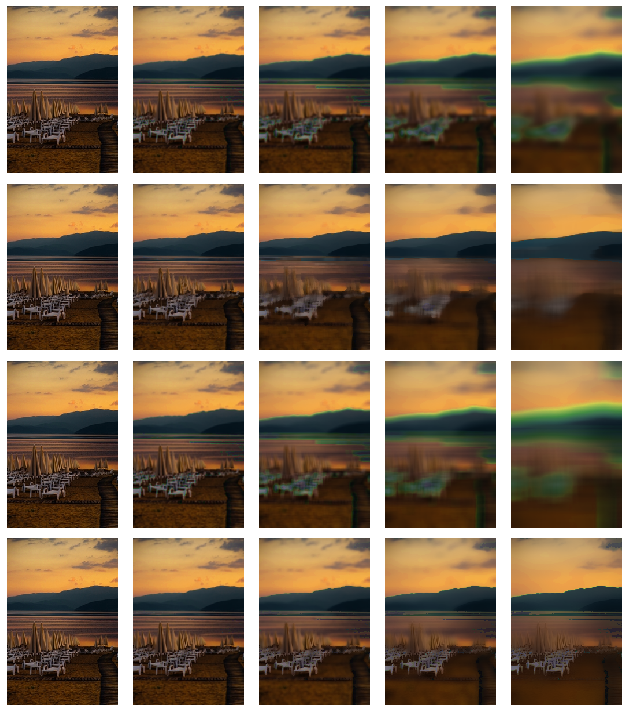

In [4]:
all_sunset_blurs = all_gauss_images + all_median_images + all_mean_images + all_bilateral_images
columns = 5
rows = 4
fig = plt.figure(figsize=(9, 10))
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(cv2.cvtColor(all_sunset_blurs[i-1], cv2.COLOR_HSV2RGB))
    plt.axis("off")
fig.tight_layout()
# plt.show()
plt.savefig(os.path.join('out-images', "all-sunset-blurs"), dpi=300)

In [5]:
def lets_blur(img_name, blur_size = 15):
    file_name = img_name + 'small.jpg'
    image = cv2.imread(os.path.join('images', file_name)) # reads the image
    color_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # convert to HSV
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    blur_images = [
        color_img,
        cv2.GaussianBlur(color_img, (blur_size, blur_size), 0),
        cv2.medianBlur(color_img, (blur_size), 0),
        cv2.blur(color_img, (blur_size, blur_size), 0),
        cv2.bilateralFilter(color_img, blur_size, 100, 100),
        cv2.Laplacian(gray_img, cv2.CV_64F)
    ]
    return blur_images

In [6]:
img_names = ['sunset', 'flower', 'house', 'leaf']
all_blur_imgs = []
for img_name in img_names:
    all_blur_imgs = all_blur_imgs + lets_blur(img_name)

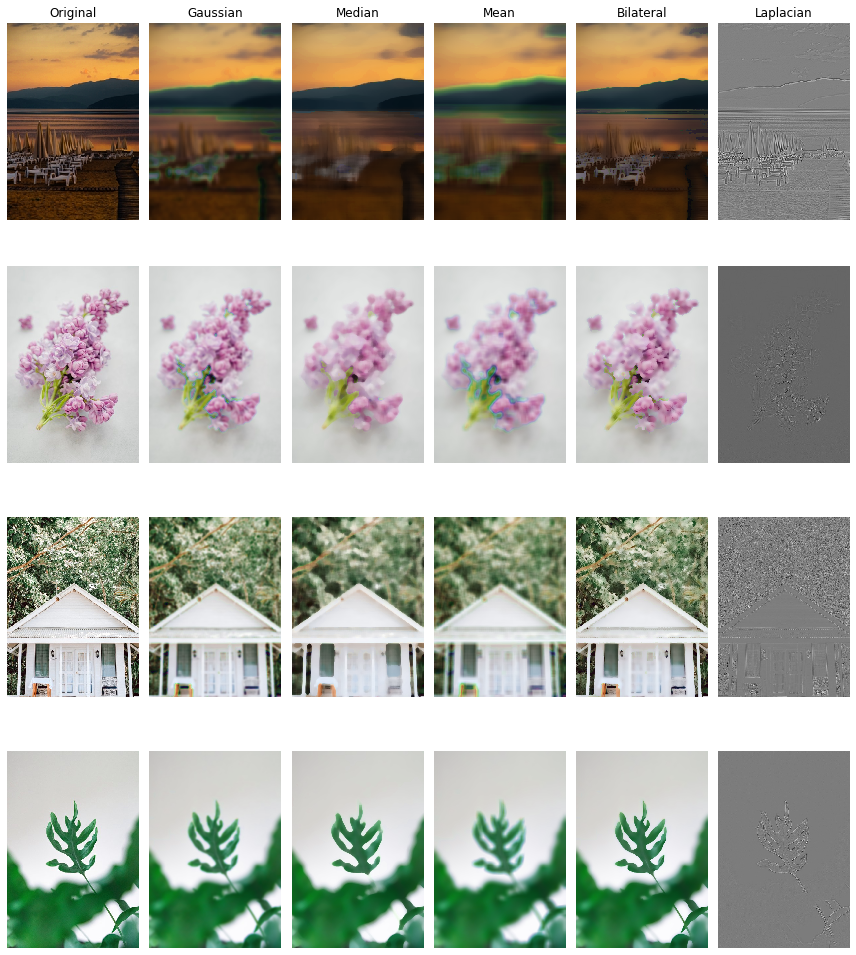

In [7]:
columns = 6
rows = len(img_names)
fig = plt.figure(figsize=(12, 14))
titles=("Original", "Gaussian", "Median", "Mean", "Bilateral", "Laplacian")
for i in range(1, columns*rows+1):
    fig.add_subplot(rows, columns, i)
    if i%6 == 0:
        plt.imshow(all_blur_imgs[i-1], cmap = 'gray') # print Laplacian
    else:
        plt.imshow(cv2.cvtColor(all_blur_imgs[i-1], cv2.COLOR_HSV2RGB)) # print other blurred images
    plt.axis("off")
    if i<7:
        plt.title(titles[i-1])
fig.tight_layout()
# plt.show()
plt.savefig(os.path.join('out-images', "all-blurs"), dpi=300)